# Project 4 - Advanced Lane Lines

#### Library Import

In [1]:
# Project Libraries
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import glob

print('Libraries Imported!')

Libraries Imported!


### Camera Calibration

In [2]:
# Load calibration images
filelist = os.listdir('./camera_cal')
chessboardImages = [cv2.imread('./camera_cal/{}'.format(image)) for image in filelist]

In [3]:
# Find the chessboard corners and undistortion matrix
nx = 9
ny = 6

# create object point
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object and image points for undistortion
objpoints = []
imgpoints = []

for image in chessboardImages:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

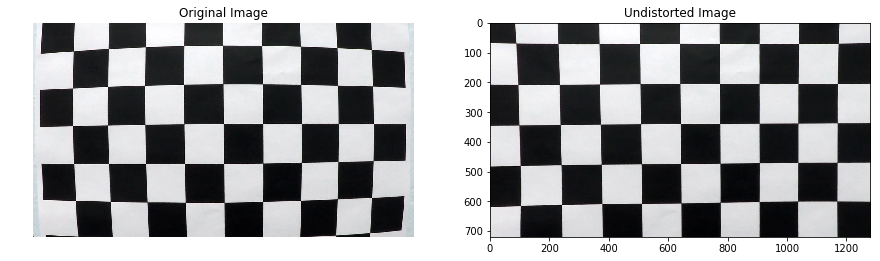

In [4]:
# Use the image and object points to undistort image
test_image = chessboardImages[0]
image_size = (test_image.shape[1], test_image.shape[0])

# Calibrate Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                   imgpoints,image_size,None,None)

dst = cv2.undistort(test_image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(dst)
ax2.set_title('Undistorted Image')
ax1.axis('off')
plt.show()

In [5]:
# Function to undistort images
def undistort(images):
    imagesUndistort = []
    for image in images:
        image_size = (image.shape[1], image.shape[0])

        # Calibrate Camera
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                imgpoints,image_size,None,None)

        imagesUndistort.append(cv2.undistort(image, mtx, dist, None, mtx))
    return np.array(imagesUndistort)

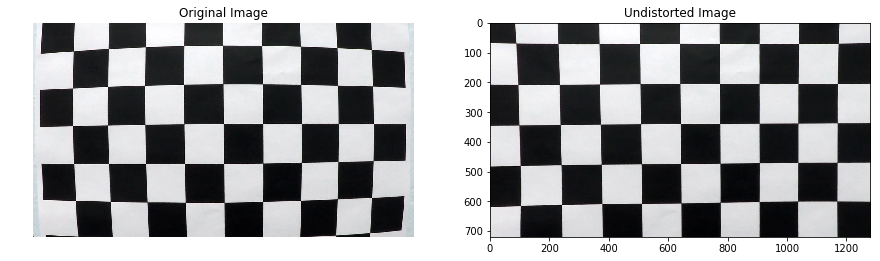

In [6]:
# Test Function
chessboardUndistorted = undistort(chessboardImages)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.imshow(chessboardImages[0])
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(chessboardUndistorted[0])
ax2.set_title('Undistorted Image')
ax1.axis('off')
plt.show()


#### Masking Function from P1

In [7]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

#vertices = np.array([[(0,imshape[0]),(450, 320), (imshape[1]-450, 320), (imshape[1],imshape[0])]], dtype=np.int32)

### Threshold Binary Image

In [8]:
# Function to plot test images
def plotImages(images):
    f, ax = plt.subplots(2,4, figsize=(15,5))
    ax = ax.ravel()
    f.tight_layout()
    for i in range(0,len(ax)):
        ax[i].imshow(images[i])
        ax[i].axis('off')
    plt.show()
def plotImagesGray(images):
    f, ax = plt.subplots(2,4, figsize=(15,5))
    ax = ax.ravel()
    f.tight_layout()
    for i in range(0,len(ax)):
        ax[i].imshow(images[i], cmap='gray')
        ax[i].axis('off')
    plt.show()

In [9]:
# Load Test Images from file
filelist=[]
for file in os.listdir('./test_images/'):
    if file.endswith('.jpg'):
        filelist.append(file)
    
images = [cv2.imread('./test_images/{}'.format(image)) for image in filelist]

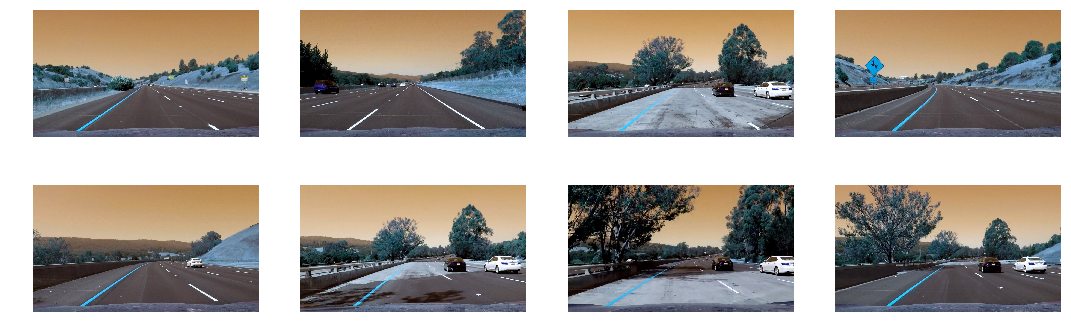

In [10]:
plotImages(images)

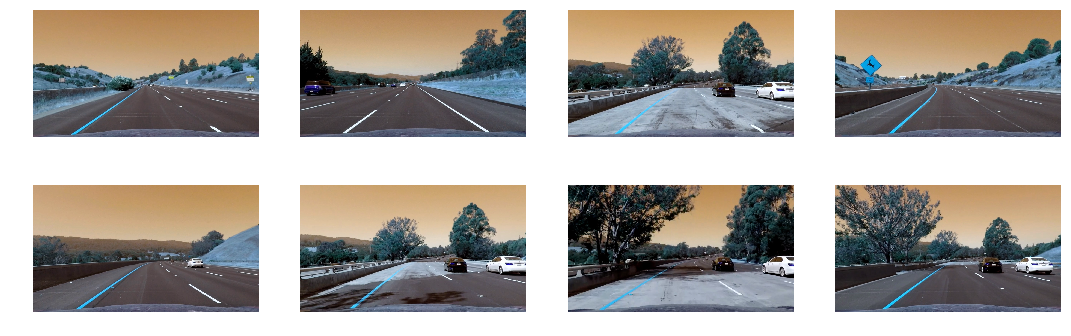

In [11]:
# Undistort Images
imagesUndist = undistort(images)
# imagesUndist = images
plotImages(imagesUndist)

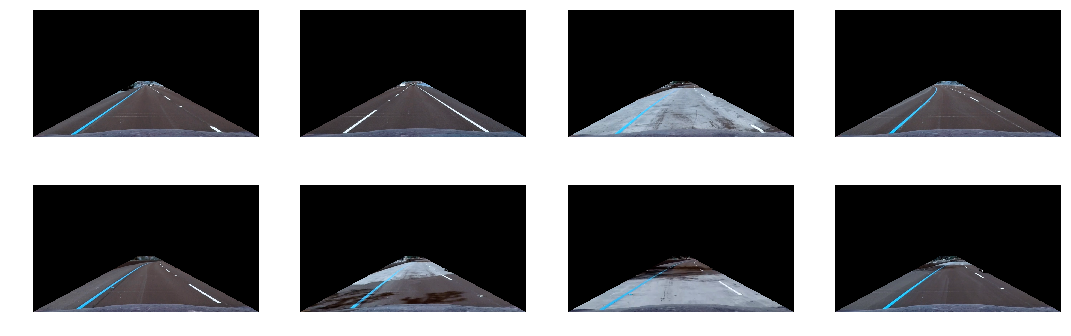

In [12]:
## Mask to region of interest
imshape = imagesUndist[0].shape
x=600
y=400
vertices = np.array([[(0,imshape[0]),(x, y), (imshape[1]-x, y), (imshape[1],imshape[0])]], dtype=np.int32)

imagesMasked = [region_of_interest(image, vertices) for image in imagesUndist]
plotImages(imagesMasked)

In [13]:
# Convert to various colorspaces to which pick out lines
images_RGB = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imagesUndist])
images_R = images_RGB[:,:,:,0]
images_G = images_RGB[:,:,:,1]
images_B = images_RGB[:,:,:,2]

images_HLS = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2HLS) for img in imagesUndist])
images_H = images_HLS[:,:,:,0]
images_L = images_HLS[:,:,:,1]
images_S = images_HLS[:,:,:,2]

images_HSV = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in imagesUndist])
images_H2 = images_HSV[:,:,:,0]
images_S2 = images_HSV[:,:,:,1]
images_V = images_HSV[:,:,:,2]

images_YUV = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2YUV) for img in imagesUndist])
images_Y = images_YUV[:,:,:,0]
images_U = images_YUV[:,:,:,1]
images_V2 = images_YUV[:,:,:,2]

images_GRAY = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in imagesUndist])

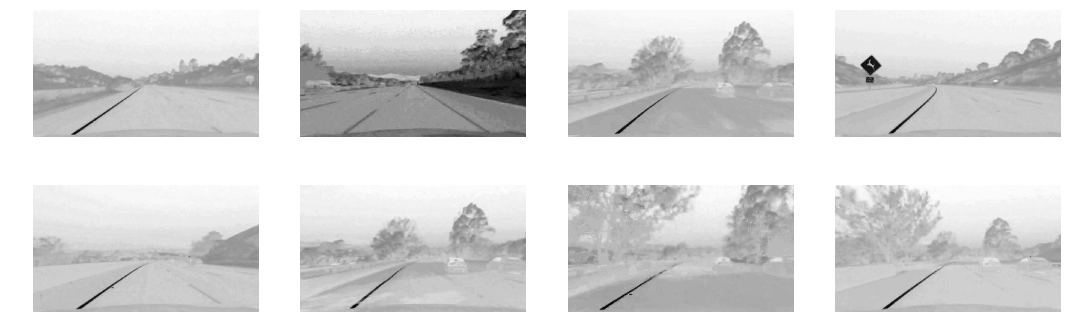

In [14]:
# Plot the colorspace for different colorspaces
plotImagesGray(images_V2)

In [15]:
# Apply thresholds to the choosen colorspaces to find the best combination
# R_channel
# H_channel
# S_channel
# V_channel
# V2_channel

def applyThreshold(images, thresh):
    thresholdImages = []
    for image in images:
        binary = np.zeros_like(image)
        binary[(image>thresh[0]) & (image<= thresh[1])] = 1
        thresholdImages.append(binary)
    return np.array(thresholdImages)


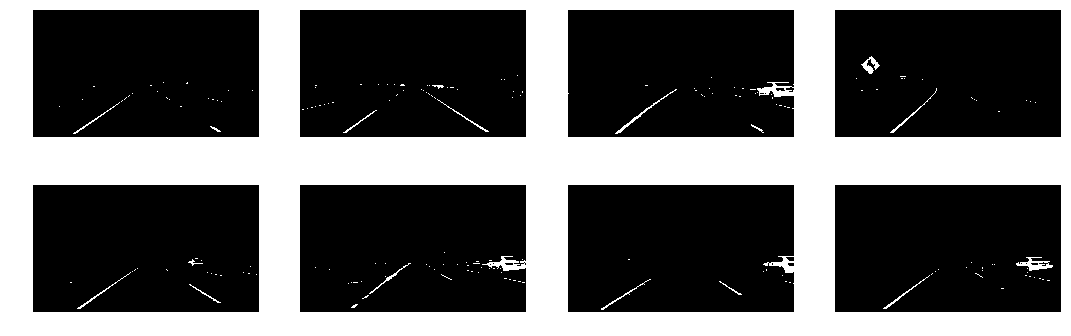

In [16]:
# R_channel
images_Rthresh = applyThreshold(images_R, (220, 255))
plotImagesGray(images_Rthresh)

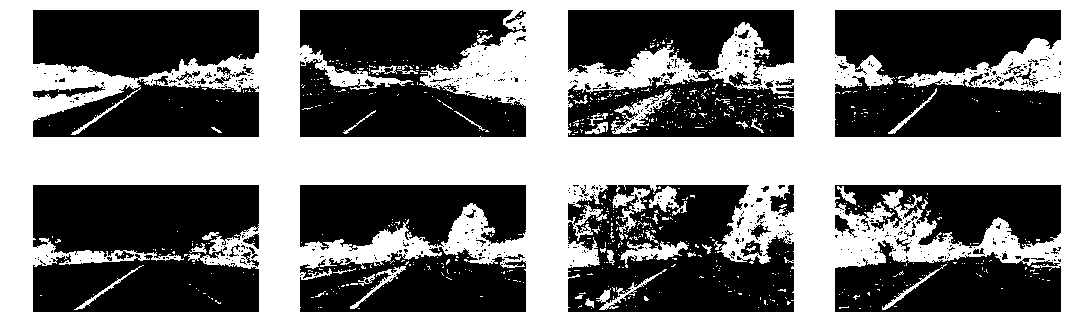

In [17]:
# H_channel
images_Hthresh = applyThreshold(images_H, (15, 100))
plotImagesGray(images_Hthresh)

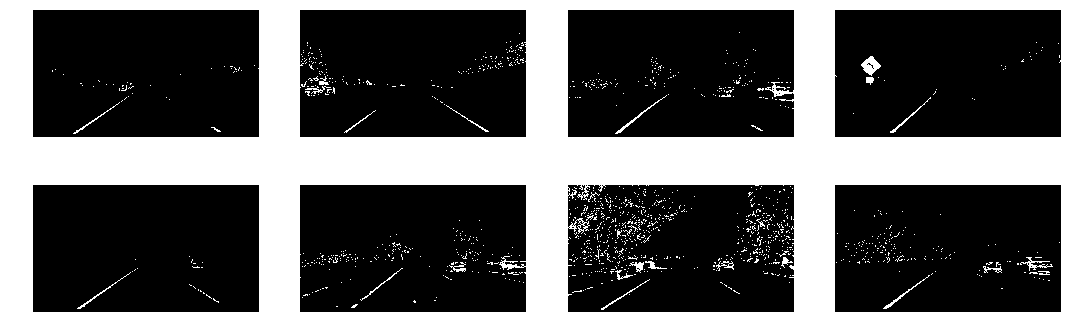

In [18]:
# S_channel
images_Sthresh = applyThreshold(images_S, (170, 255))
plotImagesGray(images_Sthresh)

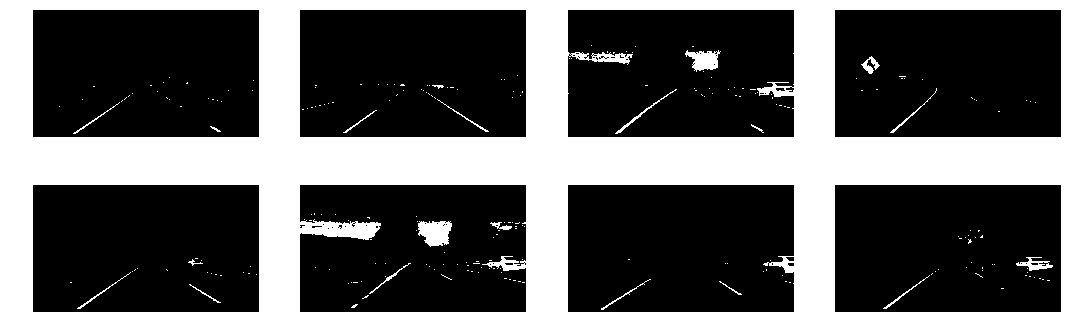

In [29]:
# V_channel
images_Vthresh = applyThreshold(images_V, (220, 255))
plotImagesGray(images_Vthresh)

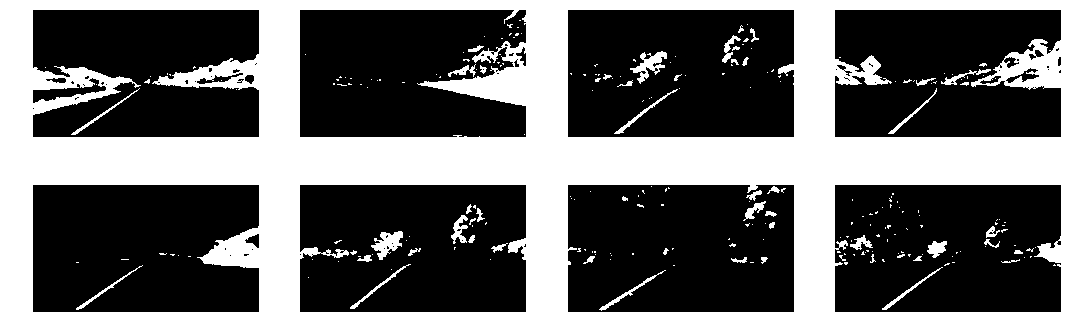

In [20]:
# V2_channel
images_V2thresh = applyThreshold(images_V2, (0, 110))
plotImagesGray(images_V2thresh)

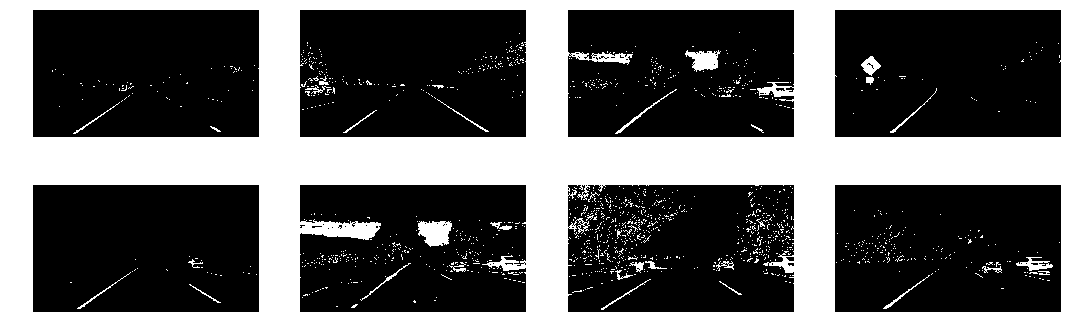

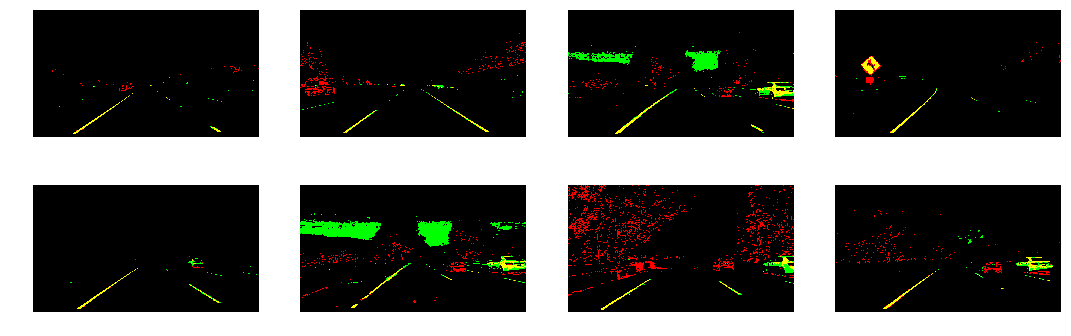

In [30]:
# Combine colorspaces to produce best binary image
binary_thresh = []
binary_thresh_compare = []
for s_image, v_image in zip(images_Sthresh, images_Vthresh):
#     plt.imshow(s_image)
#     plt.show()
#     plt.imshow(v_image)
#     plt.show()
    binaryCombined = np.zeros_like(s_image)
    binaryCombined[(s_image==1) | (v_image==1)] = 1
    binary_thresh.append(binaryCombined)
    
    stack = np.dstack((s_image*255, v_image*255, np.zeros_like(s_image)))
    binary_thresh_compare.append(stack)

binary_thresh = np.array(binary_thresh)
binary_thresh_compare = np.array(binary_thresh_compare)
plotImagesGray(binary_thresh)
plotImages(binary_thresh_compare)

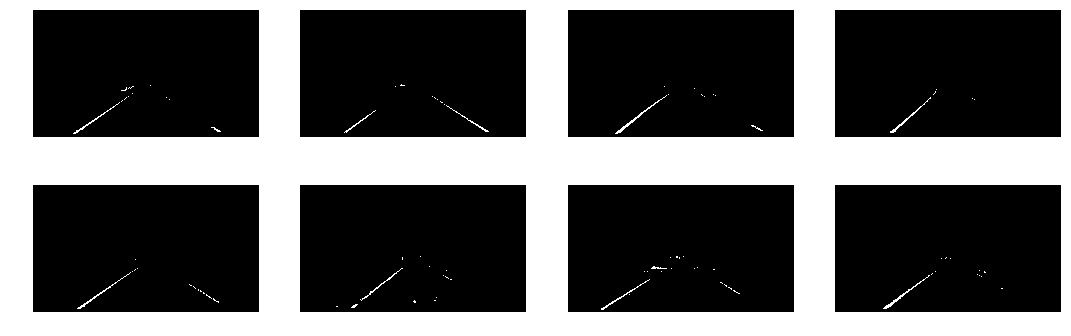

In [31]:
# Function to do the colorspace transforms
def colorspace(images):
    newImages = []
    S = [cv2.cvtColor(image, cv2.COLOR_BGR2HLS)[:,:,2] for image in images]
    V = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV)[:,:,2] for imahe in images]
    S = applyThreshold(S, (170, 255))
    V = applyThreshold(V, (225, 255))
    
    for s,v in zip(S,V):
        binaryCombined = np.zeros_like(s)
        binaryCombined[(s==1) | (v==1)] = 1
        newImages.append(binaryCombined)
        
    return np.array(newImages)

imagesColorspace = colorspace(imagesUndist)
imagesColorspace = np.array(imagesColorspace)
imagesColorspaceMasked = [region_of_interest(image, vertices) for image in imagesColorspace]
plotImagesGray(imagesColorspaceMasked)

### Gradient

In [36]:
def gradient_abs(image, orient='x', sobel_kernel=3, thresh=(0,255)):
    # convert images to grayscale, could try other colorspaces (S, V)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # absolute gradient
    if orient=='x':
        sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    sobelAbs = np.absolute(sobel)
    sobelScaled = np.uint8(255*sobel/np.max(sobelAbs))
    binary_output_abs = np.zeros_like(sobelScaled)
    binary_output_abs[(sobelScaled >= thresh[0]) & (sobelScaled <= thresh[1])] = 1

    
    return binary_output_abs

def gradient_mag(image, sobel_kernel=3, thresh=(0,255)):
    # convert images to grayscale, could try other colorspaces (S, V)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
    
    binary_output_mag = np.zeros_like(gradmag)
    binary_output_mag[(gradmag >= thresh[0]) & (gradmag <= thresh[1])] = 1
    
    return binary_output_mag
    
def gradient_dir(image, sobel_kernel=3, thresh=(0,255)):
    # convert images to grayscale, could try other colorspaces (S, V)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # Direction
    sobelAngle = np.arctan2(np.absolute(sobely),np.absolute(sobelx))
    binary_output_dir = np.zeros_like(sobelAngle)
    binary_output_dir[(sobelAngle >= thresh[0]) & (sobelAngle <= thresh[1])] = 1
    
    return binary_output_dir

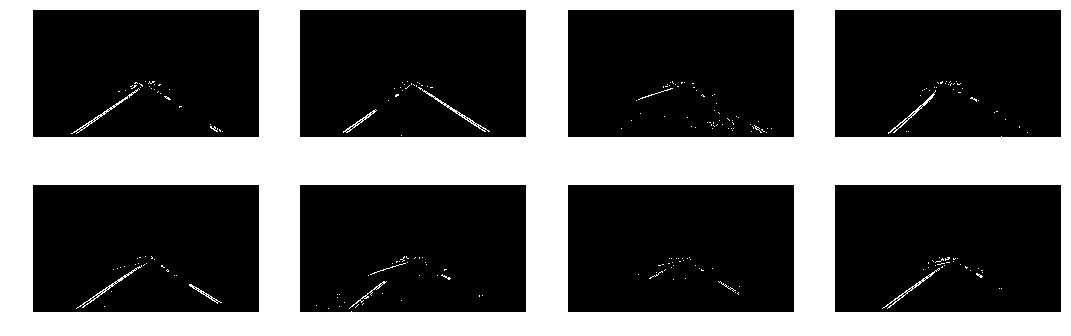

In [37]:
gradientAbsx = []
gradientAbsy = []
gradientMag = []
gradientDir = []
binary_gradient = []
for image in imagesUndist:
    grad_absx = gradient_abs(image, orient='x', sobel_kernel=15, thresh=(20,200))
    grad_absy = gradient_abs(image, orient='y', sobel_kernel=15, thresh=(20,200))
    grad_mag = gradient_mag(image, sobel_kernel=15, thresh=(40,200))
    grad_dir = gradient_dir(image, sobel_kernel=15, thresh=(0.7,1.1))
    gradientAbsx.append(grad_absx)
    gradientAbsy.append(grad_absy)
    gradientMag.append(grad_mag)
    gradientDir.append(grad_dir)
    binary_grad = np.zeros_like(grad_absx)
    binary_grad[((grad_absx==1)&(grad_absy==1)) | ((grad_mag==1)&(grad_dir==1))]=1
    binary_gradient.append(binary_grad)
    
# plotImagesGray(gradientAbsx)
# plotImagesGray(gradientAbsy)
# plotImagesGray(gradientMag)
# plotImagesGray(gradientDir)
# plotImagesGray(binary_gradient)
binary_gradient_mask = [region_of_interest(image, vertices) for image in binary_gradient]
plotImagesGray(binary_gradient_mask)

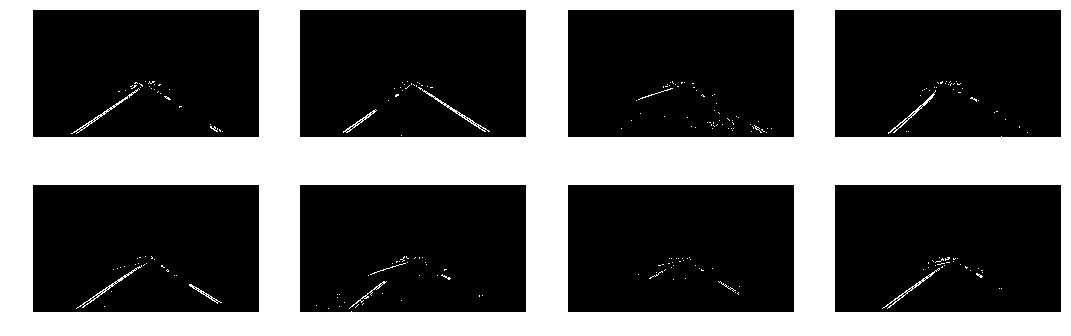

In [38]:
# Function for gradient
def gradient(images):
    newImages = []
    for image in images:
        grad_absx = gradient_abs(image, orient='x', sobel_kernel=15, thresh=(20,200))
        grad_absy = gradient_abs(image, orient='y', sobel_kernel=15, thresh=(20,200))
        grad_mag = gradient_mag(image, sobel_kernel=15, thresh=(40,200))
        grad_dir = gradient_dir(image, sobel_kernel=15, thresh=(0.7,1.1))
        binary_grad = np.zeros_like(grad_absx)
        binary_grad[((grad_absx==1)&(grad_absy==1)) | ((grad_mag==1)&(grad_dir==1))]=1
        newImages.append(binary_grad)
    return np.array(newImages)

imagesGradient = gradient(imagesUndist)
imagesGradientMasked = [region_of_interest(image, vertices) for image in imagesGradient]
plotImagesGray(imagesGradientMasked)

### Combine Color and Gradient

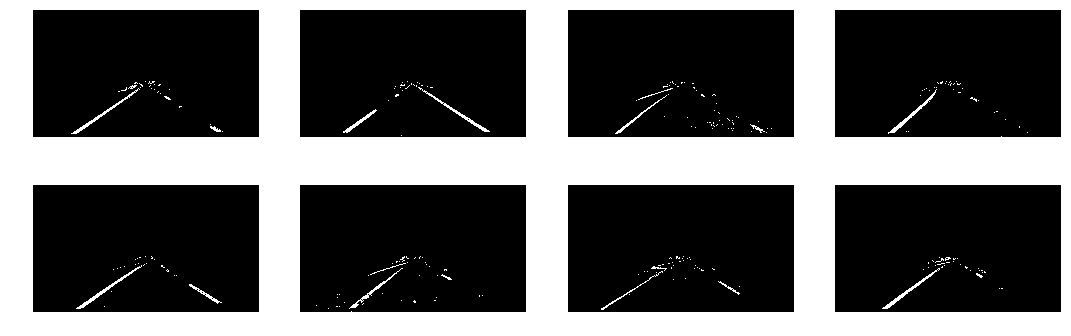

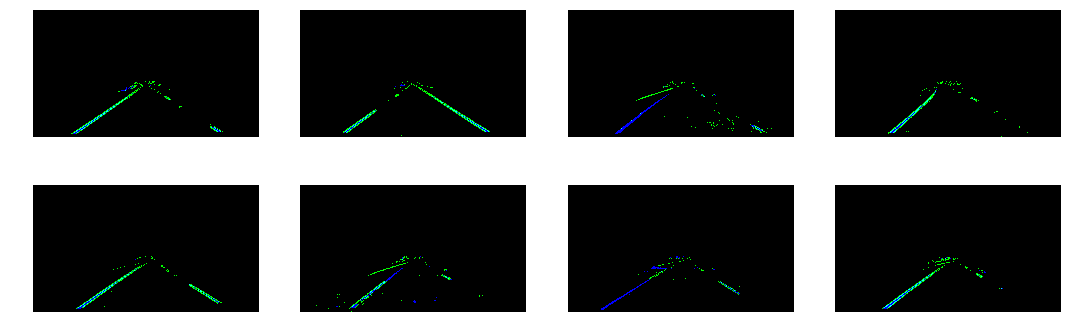

In [40]:
combined_binaries = []
combination_images = []
for g, c in zip(imagesGradientMasked, imagesColorspaceMasked):
    combined_binary = np.zeros_like(g)
    combined_binary[(g==1)|(c==1)] = 1
    combination_image = np.dstack((np.zeros_like(g), g*255, c*255))
    combined_binaries.append(combined_binary)
    combination_images.append(combination_image)
    
plotImagesGray(combined_binaries)
plotImagesGray(combination_images)